In [1]:
#using Revise

In [2]:
# Add PATH
push!(LOAD_PATH, joinpath(@__DIR__, "..", "src"))

#using PyPlot
using Plots
using BenchmarkTools
using DifferentialEquations

using LSM.PhysCon
using LSM.WaterMod
#using LSM.LeafPhotosynthesisMod
using LSM.LeafEnergyWaterBalanceMod

output_dir = joinpath(@__DIR__,"..","output")
mkpath(output_dir)

┌ Info: Recompiling stale cache file /Users/gentine/.julia/compiled/v1.2/LSM.ji for LSM [top-level]
└ @ Base loading.jl:1240


"/Users/gentine/Dropbox/Collaborations_Projects/Optimal_Stomata/Land/test/../output"

In [3]:
# stab_type_stable = 4;
# z_L = -30.0:0.001:30.0;
# psim_z = zeros(size(z_L));
# psih_z = zeros(size(z_L));
# for i=1:length(z_L) 
#     psim_z[i] = ψ_m(z_L[i],stab_type_stable);
#     psih_z[i] = ψ_h(z_L[i],stab_type_stable);
# end

In [4]:
# plot(z_L,psih_z,label="psi_h")
# plot!(z_L,psim_z,label="psi_m")

In [5]:

# function lorenz!(du,u,p,t)
#  du[1] = 10.0*(u[2]-u[1]);
#  du[2] = u[1]*(28.0-u[3]) - u[2];
#  du[3] = u[1]*u[2] - (8/3)*u[3];
# end
# u0 = [1.0;0.0;0.0];
# tspan = (0.0,100.0);
# prob = ODEProblem(lorenz!,u0,tspan);
# sol = solve(prob);

# plot(sol,vars=(1,2,3))

# Create a leaf structure
l = leaf_params{Float32}();
# Create a Flux structure
f = fluxes{Float32}();
# Create a meteo structure
met = meteo{Float32}();

#met = meteo();

# initialize some reasonable values
f.Je   = 100; f.gbc  = 100; f.gbv  = 100; f.ceair= 1500; f.eair = 1500; f.APAR = 500; f.H=0;f.LE=0; # leaf should not have eair
l.Kn = 2.44; l.α=0.2; l.ε=0.98; l.LMA=100e-3; l.RWC=80/100;l.psi_l=-1e6;l.psi_l50 = -2e6;l.ck=3;met.zscreen = 2.0;
l.height   = 1.0; met.zscreen  = 2.0;
met.stab_type_stable = 2;
l.gstyp = 3;

In [6]:

# A diurnal cycle for radiation and Tair
Deltat  = 60;
Samp    = 500; # W/m2 amplitude
Tmean   = 273.15+22;
DeltaT  = 3;
omega   = 2*π/(24*3600);
t       = range(0, stop=24*3600, step=Deltat); # diurnal cycle in seconds
#print(t)
phi_t   = omega*t-π*ones(size(t))/2;
Sdown_t = zeros(size(t));
Tair_t  = zeros(size(t));
zeros_t = zeros(size(t));
for i = 1:length(Sdown_t)
    Sdown_t[i] = Samp*max( sin(phi_t[i]),zeros_t[i] );#max(sin(phase[i]),zeros(size(t[i])));
    Tair_t[i]  = Tmean + DeltaT*sin(phi_t[i]-π/3);
end
#print(typeof(phase[1]));
#print(typeof(Sdown_t[1]));
#print(Sdown_t);
#clf();
#fig = figure("Diurnal cycle", figsize=(10,5));
# plot(t/3600,Sdown_t)
#plot!(t/3600,10*(Tair_t-273.15*ones(size(Tair_t))))
#    title = "Shortwave Incoming radiation (W/m^2)");#,
#    xlabel = "Hours",
#    ylabel = "S_{down} (W/m^2)")
#plot(t/3600,Tair_t-273.15*ones(size(Tair_t)),
#    title = "Temperature (C)",
#    xlabel = "Hours",
#    ylabel = "Temperature (C)")


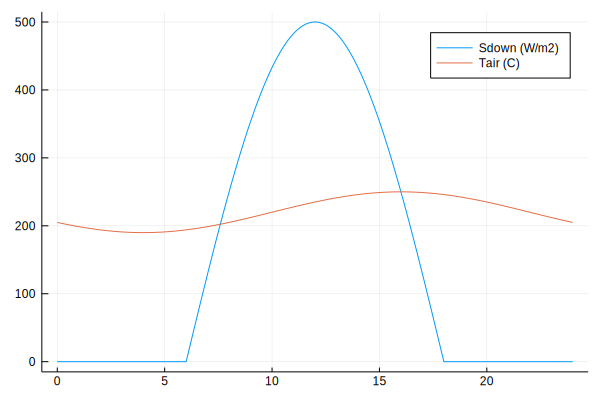

In [7]:
plot(t/3600,Sdown_t,label="Sdown (W/m2)")
plot!(t/3600,10*(Tair_t-273.15*ones(size(Tair_t))),label="Tair (C)")

In [8]:
psi_s      = -0.3e6 ; # soil water potential (Pa)
U          =  1.0;
RH         =  65/100;
eps_air    =  0.75;
tspan      =  (0.0,Deltat);
N          =  length(Sdown_t);
mutable struct parameters_ode
    l::leaf_params;
    met::meteo;
    f::fluxes;
    psi_s;
end

In [9]:
# i=700
# met.S_down = Sdown_t[i];
# met.L_down = eps_air*physcon.σ*(Tair_t[i])^4;
# met.T_air  = Tair_t[i]+1.;
# l.RH       = 0.8;
# met.e_air  = l.RH*SatVap(Tair_t[i])[1];
# VPD        = SatVap(Tair_t[i])[1] - met.e_air;
# l.VPD      = VPD;
# met.PAR    = 45/100*physcon.Wtoμmole_s*Sdown_t[i];
# met.U      = U;
# met.Ca     = 400.0; #ppm
# f.APAR     = met.PAR;
# f.Cs       = met.Ca;
# println(Sdown_t[i])

In [10]:
# setra!(l, f, met) ;

In [11]:
# LeafPhotosynthesis(f, l, met)


In [12]:
# println("An=",f.An," , ra=",l.ra,", rs=",1.0/(l.gleaf/f.g_m_s_to_mol_m2_s),", rm=",1.0/(l.gm/f.g_m_s_to_mol_m2_s),
# " ci:ca=",l.Ci/met.Ca, ", H=",f.H, " (W/m2), LE=",f.LE, " (W/m2)")

In [13]:
# f.Cs = met.Ca;
# An = 1:0.1:40;
# gs = zeros(size(An));
# for i=1:length(An)
#     f.An = An[i];
#     Medlyn!(f,  l)
#     gs[i]=l.gs;
# end

In [14]:
# plot(An*sqrt(l.VPD)/f.Cs,gs,xlabel="An.RH/Cs [mol.m-2.s-1]",ylabel="gs [mol.m-2.s-1]")

In [15]:
# met.U = 2.0;f.H=400.0;
# met.L=1e6;
# setra!(l,f,met)

In [16]:
# S = 0:1:1000;
# PAR = 45/100*physcon.Wtoμmole_s*S;
# An = zeros(size(S));
# gs = zeros(size(S));
# for i=1:length(S)
#     met.S_down = S[i];
#     f.APAR     = PAR[i];
#     met.PAR    = PAR[i];
#     LeafPhotosynthesis(f, l, met);
#     An[i]=f.An; 
#     gs[i]=l.gs;
# end

In [17]:
# plot(S,An,label="An")

In [18]:
# println(f.g_m_s_to_micromol_m2_s)
# constant = 1e6*met.P_air/(physcon.Rgas*met.T_air);
# println(constant)
# plot(S,1.0 ./ (gs/f.g_m_s_to_micromol_m2_s),label="rs")
# #print(met.RH)
# print(met.P_air)

In [19]:
# S = 250;
# PAR = 45/100*physcon.Wtoμmole_s*S;
# f.APAR     = PAR;
# met.PAR    = PAR;
# T  = 250:1:320
# An = zeros(size(T));
# for i=1:length(T)
#     l.T = T[i];
#     met.T_air = T[i];
#     LeafPhotosynthesis(f, l, met);
#     An[i]=f.An; 
# end

In [20]:
# plot(T,An,label="An")

In [21]:
# small time stepping
dt     = 0.1*60; # in s
T_t    = zeros(size(Sdown_t));
psil_t = zeros(size(Sdown_t));
Cc_t   = zeros(size(Sdown_t));
Rn_t   = zeros(size(Sdown_t));
GPP_t  = zeros(size(Sdown_t));
GPP_diffusion_t  = zeros(size(Sdown_t));
LUE_t  = zeros(size(Sdown_t));
H_t    = zeros(size(Sdown_t));
LE_t   = zeros(size(Sdown_t));
rs_t   = zeros(size(Sdown_t));
ra_t   = zeros(size(Sdown_t));

function f_ode!(du,u,p,t) # p are parameters
    du .= LeafEnergyWaterBalance(u[1], u[2], u[3], p.met, p.l, p.f, p.psi_s);
    #println("du_inside = $(du), u_inside = $(u)")
end

let
    # initial conditions
    met.T_air  = Tair_t[1];
    l.T        = met.T_air;
    l.psi_l    = psi_s;
    l.Cc       = 0.6*met.Ca;
    #println("Tair1=",met.T_air," Tleaf1=",l.T," psi_leaf1=",l.psi_l)
        
    for i=1:N
        met.S_down = Sdown_t[i];
        met.L_down = eps_air*physcon.σ*(Tair_t[i])^4;
        met.T_air  = Tair_t[i];
        met.e_air  = RH*SatVap(Tair_t[i])[1];
        met.PAR    = 45/100*physcon.Wtoμmole_s*Sdown_t[i];
        f.APAR     = met.PAR;
        met.U      = U;
        met.Ca     = 400.0; #ppm
        f.APAR     = met.PAR;
        #println("Tair=",met.T_air," Tleaf=",l.T," psi_leaf=",l.psi_l)
        for j=1:trunc(Deltat/dt)
            u    = [l.T;l.psi_l;l.Cc];
            p    = parameters_ode(l,met,f,psi_s);
            #(p.met, p.l,  p.psi_s, p.U)    = [l;met;psi_s;U];
            #prob = ODEProblem(f_ode!,u0,tspan,p);
            #du   = zeros(size(u));
            #f_ode!(du,u,p,t,dummy);
            #println("du_outside = $(du), u_outside = $(u)")
            # Rn_t[i] = dummy[3]; H_t[i] = dummy[4]; LE_t[i] = dummy[5];
            
            
            du   = zeros(size(u));
            f_ode!(du,u,p,t);
            (l.T,l.psi_l,l.Cc) = du*dt+u;
            
#            u0   = [l.T;l.psi_l;l.Cc];
#            prob = ODEProblem(f_ode!,u0,tspan,p);
#            sol  = solve(prob);            
#            # save values
#            met = p.met;
#            f   = p.f;
#            l   = p.l;
#            (l.T,l.psi_l,l.Cc) = sol[1:3,end];
            
            #println("Cc_out=",l.Cc)
            Rn_t[i] = p.f.Rn; H_t[i] = p.f.H; LE_t[i] = p.f.LE; 
            rs_t[i] = 1.0/(p.l.gs/p.f.g_m_s_to_mol_m2_s); 
            ra_t[i] = p.f.ra; 
            GPP_t[i]= p.f.An_biochemistry; 
            GPP_diffusion_t[i]= p.f.An_diffusion; 
            LUE_t[i]= p.f.An_biochemistry/f.APAR; 
            
            #T_old   = l.T;
            #(l.T,l.psi_l) = du*dt+u;
            T_t[i]    = l.T ; #  = T_old; 
            psil_t[i] = l.psi_l;
            Cc_t[i]   = l.Cc;
            
            if(abs(H_t[i])>500)
                println("index ($i) ($j)")
            end
            
            
#             (dumb,l.psi_l) = du*dt+u;
#             T_t[i]  = dumb ; #  = T_old; 

            
        end
    end

#     l.T        = Tair_t[1]; # initialize temperature of the leaf
#     l.psi_l    = psi_s;

#     for i=1:N
#         met.S_down = Sdown_t[i];
#         met.L_down = eps_air*physcon.σ*(Tair_t[i])^4;
#         met.T_air  = Tair_t[i];
#         met.ea_air = RH*SatVap(Tair_t[i])[1];
#         u0   = [l.T;l.psi_l];
#         p    = parameters_ode(l,met,psi_s);
#         #(p.met, p.l,  p.psi_s, p.U)    = [l;met;psi_s;U];
#         prob = ODEProblem(f_ode!,u0,tspan,p);
#         sol  = solve(prob);
#         (l.T,l.psi_l) = sol[:,end];
#         T_t[i] = l.T; psil_t[i]=l.psi_l;
#         #print((l.T,l.psi_l) )
#         #dT_dt,dH2Ol_dt = LeafEnergyWaterBalance(met, l, psi_s);
#         #l.T        = l.T + Deltat*dT_dt;
#     end

   
end


Cs=390.80917, ra=39.93773, ra/rleaf=0.05744274, Cc=240.0, Ca=400.0 L=-110.834915 u*=0.15685199 H=0.0
390.80917 ppm, 0.844280029296875 (kPA), -0.6368579 micromol/s/m2   An_diffusion=9.425572Cs=391.6136, ra=60.23544, ra/rleaf=0.08417952, Cc=300.37457, Ca=400.0 L=11.939049 u*=0.1288469 H=-14.918403
391.6136 ppm, 0.7343681640625 (kPA), -0.6132562 micromol/s/m2   An_diffusion=5.702438Cs=392.49167, ra=90.7437, ra/rleaf=0.121629335, Cc=338.26874, Ca=400.0 L=4.9243584 u*=0.10497642 H=-18.543135
392.49167 ppm, 0.642075927734375 (kPA), -0.5925355 micromol/s/m2   An_diffusion=3.3889332Cs=393.56107, ra=134.36662, ra/rleaf=0.170151, Cc=362.15756, Ca=400.0 L=2.7854712 u*=0.08626891 H=-17.888832
393.56107 ppm, 0.560083740234375 (kPA), -0.57349044 micromol/s/m2   An_diffusion=1.9627193Cs=395.04135, ra=183.93652, ra/rleaf=0.21916503, Cc=377.37482, Ca=400.0 L=1.8331218 u*=0.073733695 H=-16.760138
395.04135 ppm, 0.48530126953125 (kPA), -0.5556362 micromol/s/m2   An_diffusion=1.1041584Cs=396.76505, ra=224

401.79974 ppm, 0.001 (kPA), -0.3099443 micromol/s/m2   An_diffusion=-0.31371132Cs=401.79236, ra=234.76752, ra/rleaf=0.2637194, Cc=406.7965, Ca=400.0 L=0.3329726 u*=0.0652651 H=-59.624332
401.79236 ppm, 0.001 (kPA), -0.30920753 micromol/s/m2   An_diffusion=-0.3127586Cs=401.78543, ra=234.5326, ra/rleaf=0.26352507, Cc=406.7752, Ca=400.0 L=0.3322158 u*=0.065297775 H=-59.84996
401.78543 ppm, 0.001 (kPA), -0.30851412 micromol/s/m2   An_diffusion=-0.31186065Cs=401.7789, ra=234.31099, ra/rleaf=0.26334167, Cc=406.75513, Ca=400.0 L=0.3315046 u*=0.06532865 H=-60.06346
401.7789 ppm, 0.001 (kPA), -0.3078598 micromol/s/m2   An_diffusion=-0.3110138Cs=401.77277, ra=234.10196, ra/rleaf=0.26316857, Cc=406.7362, Ca=400.0 L=0.33083624 u*=0.065357804 H=-60.265423
401.77277 ppm, 0.001 (kPA), -0.30724305 micromol/s/m2   An_diffusion=-0.31021553Cs=401.76697, ra=233.90503, ra/rleaf=0.2630054, Cc=406.71838, Ca=400.0 L=0.33020872 u*=0.06538531 H=-60.45621
401.76697 ppm, 0.001 (kPA), -0.3066624 micromol/s/m2   An

401.6635 ppm, 0.001 (kPA), -0.29585722 micromol/s/m2   An_diffusion=-0.29594815Cs=401.6633, ra=230.32831, ra/rleaf=0.25996426, Cc=406.39813, Ca=400.0 L=0.3191848 u*=0.065891035 H=-63.593422
401.6633 ppm, 0.001 (kPA), -0.2958385 micromol/s/m2   An_diffusion=-0.2959279Cs=401.66312, ra=230.32301, ra/rleaf=0.25995985, Cc=406.39758, Ca=400.0 L=0.31915277 u*=0.065891795 H=-63.601997
401.66312 ppm, 0.001 (kPA), -0.2958106 micromol/s/m2   An_diffusion=-0.29590428Cs=401.66293, ra=230.31438, ra/rleaf=0.2599526, Cc=406.39703, Ca=400.0 L=0.31912544 u*=0.06589303 H=-63.611027
401.66293 ppm, 0.001 (kPA), -0.29578403 micromol/s/m2   An_diffusion=-0.29588175Cs=401.66272, ra=230.3059, ra/rleaf=0.2599455, Cc=406.39645, Ca=400.0 L=0.3190996 u*=0.065894246 H=-63.619686
401.66272 ppm, 0.001 (kPA), -0.29575938 micromol/s/m2   An_diffusion=-0.2958578Cs=401.66254, ra=230.29784, ra/rleaf=0.2599388, Cc=406.39587, Ca=400.0 L=0.31907505 u*=0.06589539 H=-63.627922
401.66254 ppm, 0.001 (kPA), -0.29573545 micromol/s

401.65057 ppm, 0.001 (kPA), -0.29424343 micromol/s/m2   An_diffusion=-0.29431838Cs=401.65042, ra=229.88083, ra/rleaf=0.25953376, Cc=406.35922, Ca=400.0 L=0.31780204 u*=0.06595514 H=-63.697605
401.65042 ppm, 0.001 (kPA), -0.29422408 micromol/s/m2   An_diffusion=-0.29429933Cs=401.65027, ra=229.87411, ra/rleaf=0.25952813, Cc=406.35876, Ca=400.0 L=0.31778374 u*=0.0659561 H=-63.704063
401.65027 ppm, 0.001 (kPA), -0.29420602 micromol/s/m2   An_diffusion=-0.29428038Cs=401.65012, ra=229.86797, ra/rleaf=0.259523, Cc=406.3583, Ca=400.0 L=0.31776586 u*=0.06595698 H=-63.7102
401.65012 ppm, 0.001 (kPA), -0.29418862 micromol/s/m2   An_diffusion=-0.29426125Cs=401.65, ra=229.86195, ra/rleaf=0.259518, Cc=406.35788, Ca=400.0 L=0.31774947 u*=0.065957844 H=-63.71599
401.65 ppm, 0.001 (kPA), -0.29417184 micromol/s/m2   An_diffusion=-0.29424348Cs=401.64984, ra=229.85645, ra/rleaf=0.25951338, Cc=406.35745, Ca=400.0 L=0.3177343 u*=0.065958634 H=-63.721317
401.64984 ppm, 0.001 (kPA), -0.29415697 micromol/s/m2 

401.63898 ppm, 0.001 (kPA), -0.29278362 micromol/s/m2   An_diffusion=-0.29285526Cs=401.63882, ra=229.46877, ra/rleaf=0.25913405, Cc=406.32422, Ca=400.0 L=0.3165835 u*=0.06601433 H=-63.764256
401.63882 ppm, 0.001 (kPA), -0.29276747 micromol/s/m2   An_diffusion=-0.29283738Cs=401.63867, ra=229.46346, ra/rleaf=0.2591296, Cc=406.3238, Ca=400.0 L=0.31656826 u*=0.066015095 H=-63.76954
401.63867 ppm, 0.001 (kPA), -0.29275274 micromol/s/m2   An_diffusion=-0.29281938Cs=401.63855, ra=229.4583, ra/rleaf=0.2591253, Cc=406.3234, Ca=400.0 L=0.31655446 u*=0.06601583 H=-63.774467
401.63855 ppm, 0.001 (kPA), -0.2927393 micromol/s/m2   An_diffusion=-0.2928027Cs=401.6384, ra=229.45363, ra/rleaf=0.2591146, Cc=406.32303, Ca=400.0 L=0.316584 u*=0.0660165 H=-63.72737
401.6384 ppm, 0.001 (kPA), -0.2927264 micromol/s/m2   An_diffusion=-0.29279Cs=401.63828, ra=229.45195, ra/rleaf=0.2591132, Cc=406.32263, Ca=400.0 L=0.31655756 u*=0.06601675 H=-63.733395
401.63828 ppm, 0.001 (kPA), -0.29270464 micromol/s/m2   An_d

401.62738 ppm, 0.001 (kPA), -0.29132417 micromol/s/m2   An_diffusion=-0.2913908Cs=401.62723, ra=229.06207, ra/rleaf=0.25873342, Cc=406.28925, Ca=400.0 L=0.31538197 u*=0.0660729 H=-63.793625
401.62723 ppm, 0.001 (kPA), -0.29130504 micromol/s/m2   An_diffusion=-0.29137546Cs=401.6271, ra=229.05592, ra/rleaf=0.2587283, Cc=406.28882, Ca=400.0 L=0.31536338 u*=0.06607379 H=-63.799953
401.6271 ppm, 0.001 (kPA), -0.29128712 micromol/s/m2   An_diffusion=-0.2913577Cs=401.62695, ra=229.04959, ra/rleaf=0.258723, Cc=406.2884, Ca=400.0 L=0.3153457 u*=0.06607471 H=-63.806168
401.62695 ppm, 0.001 (kPA), -0.29126984 micromol/s/m2   An_diffusion=-0.29134Cs=401.6268, ra=229.04358, ra/rleaf=0.25871792, Cc=406.28796, Ca=400.0 L=0.3153294 u*=0.06607557 H=-63.81198
401.6268 ppm, 0.001 (kPA), -0.29125378 micromol/s/m2   An_diffusion=-0.29132217Cs=401.62668, ra=229.03802, ra/rleaf=0.25871328, Cc=406.28757, Ca=400.0 L=0.31531435 u*=0.066076376 H=-63.817345
401.62668 ppm, 0.001 (kPA), -0.29123843 micromol/s/m2   

401.61703 ppm, 0.001 (kPA), -0.29002884 micromol/s/m2   An_diffusion=-0.29009187Cs=401.61697, ra=228.69882, ra/rleaf=0.25837728, Cc=406.25815, Ca=400.0 L=0.31430846 u*=0.066125356 H=-63.832706
401.61697 ppm, 0.001 (kPA), -0.2900091 micromol/s/m2   An_diffusion=-0.29007405Cs=401.61682, ra=228.6896, ra/rleaf=0.25836957, Cc=406.25775, Ca=400.0 L=0.31429127 u*=0.06612669 H=-63.84006
401.61682 ppm, 0.001 (kPA), -0.2899905 micromol/s/m2   An_diffusion=-0.29005867Cs=401.61667, ra=228.68372, ra/rleaf=0.25836465, Cc=406.25735, Ca=400.0 L=0.31427333 u*=0.06612754 H=-63.84617
401.61667 ppm, 0.001 (kPA), -0.28997338 micromol/s/m2   An_diffusion=-0.29004222Cs=401.61655, ra=228.67758, ra/rleaf=0.25835952, Cc=406.25693, Ca=400.0 L=0.31425637 u*=0.06612843 H=-63.85219
401.61655 ppm, 0.001 (kPA), -0.28995687 micromol/s/m2   An_diffusion=-0.29002443Cs=401.6164, ra=228.67177, ra/rleaf=0.25835466, Cc=406.25653, Ca=400.0 L=0.31424075 u*=0.06612927 H=-63.85779
401.6164 ppm, 0.001 (kPA), -0.28994164 micromol

401.60696 ppm, 0.001 (kPA), -0.2887572 micromol/s/m2   An_diffusion=-0.28881946Cs=401.6069, ra=228.33612, ra/rleaf=0.25802308, Cc=406.22772, Ca=400.0 L=0.31325233 u*=0.06617785 H=-63.879013
401.6069 ppm, 0.001 (kPA), -0.28873828 micromol/s/m2   An_diffusion=-0.28880164Cs=401.60675, ra=228.32716, ra/rleaf=0.25801557, Cc=406.22736, Ca=400.0 L=0.31323573 u*=0.06617916 H=-63.88615
401.60675 ppm, 0.001 (kPA), -0.2887205 micromol/s/m2   An_diffusion=-0.28878757Cs=401.60663, ra=228.32146, ra/rleaf=0.25801077, Cc=406.22696, Ca=400.0 L=0.31321853 u*=0.06617998 H=-63.89206
401.60663 ppm, 0.001 (kPA), -0.28870404 micromol/s/m2   An_diffusion=-0.28877106Cs=401.60648, ra=228.31554, ra/rleaf=0.2580058, Cc=406.22656, Ca=400.0 L=0.31320223 u*=0.06618084 H=-63.89787
401.60648 ppm, 0.001 (kPA), -0.28868812 micromol/s/m2   An_diffusion=-0.28875458Cs=401.60635, ra=228.30992, ra/rleaf=0.25800112, Cc=406.22617, Ca=400.0 L=0.3131873 u*=0.06618165 H=-63.90327
401.60635 ppm, 0.001 (kPA), -0.288673 micromol/s/m

401.59872 ppm, 0.001 (kPA), -0.28771394 micromol/s/m2   An_diffusion=-0.28776985Cs=401.59857, ra=228.02753, ra/rleaf=0.25772166, Cc=406.2027, Ca=400.0 L=0.31240943 u*=0.06622262 H=-63.908524
401.59857 ppm, 0.001 (kPA), -0.2877025 micromol/s/m2   An_diffusion=-0.28775802Cs=401.59854, ra=228.03644, ra/rleaf=0.25772914, Cc=406.20236, Ca=400.0 L=0.31237912 u*=0.06622133 H=-63.91098
401.59854 ppm, 0.001 (kPA), -0.28768367 micromol/s/m2   An_diffusion=-0.28773955Cs=401.5984, ra=228.02597, ra/rleaf=0.25772035, Cc=406.20203, Ca=400.0 L=0.31236282 u*=0.06622285 H=-63.918716
401.5984 ppm, 0.001 (kPA), -0.28766528 micromol/s/m2   An_diffusion=-0.2877274Cs=401.59827, ra=228.02032, ra/rleaf=0.25771564, Cc=406.20166, Ca=400.0 L=0.3123448 u*=0.066223666 H=-63.924778
401.59827 ppm, 0.001 (kPA), -0.28764746 micromol/s/m2   An_diffusion=-0.28771222Cs=401.59814, ra=228.0141, ra/rleaf=0.2577104, Cc=406.20126, Ca=400.0 L=0.31232798 u*=0.06622457 H=-63.930843
401.59814 ppm, 0.001 (kPA), -0.2876311 micromol/

401.58853 ppm, 0.001 (kPA), -0.28642118 micromol/s/m2   An_diffusion=-0.28648123Cs=401.5884, ra=227.65802, ra/rleaf=0.2573645, Cc=406.17188, Ca=400.0 L=0.31130418 u*=0.06627634 H=-63.989388
401.5884 ppm, 0.001 (kPA), -0.28640798 micromol/s/m2   An_diffusion=-0.28646582Cs=401.58832, ra=227.65324, ra/rleaf=0.25736052, Cc=406.17154, Ca=400.0 L=0.31129184 u*=0.066277035 H=-63.99394
401.58832 ppm, 0.001 (kPA), -0.28639606 micromol/s/m2   An_diffusion=-0.28645182Cs=401.5882, ra=227.64896, ra/rleaf=0.2573569, Cc=406.1712, Ca=400.0 L=0.31127998 u*=0.06627766 H=-63.998184
401.5882 ppm, 0.001 (kPA), -0.28638408 micromol/s/m2   An_diffusion=-0.28643763Cs=401.58807, ra=227.64484, ra/rleaf=0.2573477, Cc=406.17087, Ca=400.0 L=0.31130514 u*=0.066278264 H=-63.95784
401.58807 ppm, 0.001 (kPA), -0.28637344 micromol/s/m2   An_diffusion=-0.2864256Cs=401.588, ra=227.65358, ra/rleaf=0.25735503, Cc=406.17056, Ca=400.0 L=0.31127578 u*=0.06627699 H=-63.960186
401.588 ppm, 0.001 (kPA), -0.28635517 micromol/s/m2

401.57925 ppm, 0.001 (kPA), -0.28525236 micromol/s/m2   An_diffusion=-0.28530285Cs=401.57913, ra=227.31728, ra/rleaf=0.25702757, Cc=406.1438, Ca=400.0 L=0.31036505 u*=0.066326 H=-64.00058
401.57913 ppm, 0.001 (kPA), -0.28524232 micromol/s/m2   An_diffusion=-0.28529206Cs=401.5791, ra=227.32587, ra/rleaf=0.25703478, Cc=406.1435, Ca=400.0 L=0.31033662 u*=0.06632474 H=-64.002815
401.5791 ppm, 0.001 (kPA), -0.28522405 micromol/s/m2   An_diffusion=-0.28527513Cs=401.57895, ra=227.31593, ra/rleaf=0.25702643, Cc=406.1432, Ca=400.0 L=0.3103216 u*=0.06632619 H=-64.0101
401.57895 ppm, 0.001 (kPA), -0.28520727 micromol/s/m2   An_diffusion=-0.28526416Cs=401.57886, ra=227.31068, ra/rleaf=0.25702202, Cc=406.14285, Ca=400.0 L=0.31030494 u*=0.06632696 H=-64.015755
401.57886 ppm, 0.001 (kPA), -0.2851916 micromol/s/m2   An_diffusion=-0.28525028Cs=401.57874, ra=227.30486, ra/rleaf=0.2570171, Cc=406.1425, Ca=400.0 L=0.31028947 u*=0.06632781 H=-64.02141
401.57874 ppm, 0.001 (kPA), -0.2851766 micromol/s/m2   

401.5708 ppm, 0.001 (kPA), -0.28417915 micromol/s/m2   An_diffusion=-0.2842306Cs=401.5707, ra=227.00566, ra/rleaf=0.2567278, Cc=406.1182, Ca=400.0 L=0.30943984 u*=0.0663715 H=-64.079926
401.5707 ppm, 0.001 (kPA), -0.28416854 micromol/s/m2   An_diffusion=-0.28421775Cs=401.5706, ra=227.00174, ra/rleaf=0.25671923, Cc=406.1179, Ca=400.0 L=0.30946422 u*=0.066372074 H=-64.042465
401.5706 ppm, 0.001 (kPA), -0.28415862 micromol/s/m2   An_diffusion=-0.28420684Cs=401.57056, ra=227.0103, ra/rleaf=0.2567264, Cc=406.1176, Ca=400.0 L=0.30943662 u*=0.06637082 H=-64.044556
401.57056 ppm, 0.001 (kPA), -0.28414163 micromol/s/m2   An_diffusion=-0.28419134Cs=401.57043, ra=227.00061, ra/rleaf=0.25671828, Cc=406.1173, Ca=400.0 L=0.30942306 u*=0.066372246 H=-64.05147
401.57043 ppm, 0.001 (kPA), -0.2841261 micromol/s/m2   An_diffusion=-0.28418028Cs=401.5703, ra=226.99585, ra/rleaf=0.25671428, Cc=406.11697, Ca=400.0 L=0.30940688 u*=0.06637294 H=-64.05683
401.5703 ppm, 0.001 (kPA), -0.2841105 micromol/s/m2   An

401.5621 ppm, 0.001 (kPA), -0.283068 micromol/s/m2   An_diffusion=-0.28312182Cs=401.56198, ra=226.68456, ra/rleaf=0.25641122, Cc=406.0917, Ca=400.0 L=0.30852574 u*=0.0664185 H=-64.10554
401.56198 ppm, 0.001 (kPA), -0.2830557 micromol/s/m2   An_diffusion=-0.28310773Cs=401.5619, ra=226.67993, ra/rleaf=0.25640735, Cc=406.0914, Ca=400.0 L=0.30851337 u*=0.06641918 H=-64.11007
401.5619 ppm, 0.001 (kPA), -0.2830439 micromol/s/m2   An_diffusion=-0.28309503Cs=401.56177, ra=226.67557, ra/rleaf=0.25640365, Cc=406.0911, Ca=400.0 L=0.30850163 u*=0.06641981 H=-64.114365
401.56177 ppm, 0.001 (kPA), -0.28303206 micromol/s/m2   An_diffusion=-0.28308225Cs=401.56168, ra=226.67142, ra/rleaf=0.25640017, Cc=406.0908, Ca=400.0 L=0.30849048 u*=0.06642042 H=-64.11843
401.56168 ppm, 0.001 (kPA), -0.28302145 micromol/s/m2   An_diffusion=-0.2830694Cs=401.56158, ra=226.66748, ra/rleaf=0.25639686, Cc=406.0905, Ca=400.0 L=0.30848 u*=0.066420995 H=-64.122284
401.56158 ppm, 0.001 (kPA), -0.28301093 micromol/s/m2   An_

401.55493 ppm, 0.001 (kPA), -0.28216457 micromol/s/m2   An_diffusion=-0.28220978Cs=401.55484, ra=226.41591, ra/rleaf=0.25615066, Cc=406.07, Ca=400.0 L=0.30776927 u*=0.06645789 H=-64.154205
401.55484 ppm, 0.001 (kPA), -0.28215465 micromol/s/m2   An_diffusion=-0.2821982Cs=401.55472, ra=226.41243, ra/rleaf=0.2561429, Cc=406.06973, Ca=400.0 L=0.30779055 u*=0.0664584 H=-64.1202
401.55472 ppm, 0.001 (kPA), -0.28214592 micromol/s/m2   An_diffusion=-0.28218836Cs=401.5547, ra=226.41997, ra/rleaf=0.2561493, Cc=406.0695, Ca=400.0 L=0.30776605 u*=0.066457294 H=-64.12209
401.5547 ppm, 0.001 (kPA), -0.2821311 micromol/s/m2   An_diffusion=-0.28217462Cs=401.55457, ra=226.41129, ra/rleaf=0.25614196, Cc=406.0692, Ca=400.0 L=0.30775338 u*=0.06645857 H=-64.128426
401.55457 ppm, 0.001 (kPA), -0.28211614 micromol/s/m2   An_diffusion=-0.2821646Cs=401.55447, ra=226.4068, ra/rleaf=0.25613818, Cc=406.0689, Ca=400.0 L=0.30773863 u*=0.06645922 H=-64.1334
401.55447 ppm, 0.001 (kPA), -0.2821024 micromol/s/m2   An_d

401.54718 ppm, 0.001 (kPA), -0.2811729 micromol/s/m2   An_diffusion=-0.28122187Cs=401.54706, ra=226.12714, ra/rleaf=0.2558654, Cc=406.04642, Ca=400.0 L=0.30695382 u*=0.066500306 H=-64.17477
401.54706 ppm, 0.001 (kPA), -0.28116113 micromol/s/m2   An_diffusion=-0.28120926Cs=401.54697, ra=226.12285, ra/rleaf=0.2558618, Cc=406.04614, Ca=400.0 L=0.30694205 u*=0.06650094 H=-64.17906
401.54697 ppm, 0.001 (kPA), -0.28115 micromol/s/m2   An_diffusion=-0.28119788Cs=401.54688, ra=226.11865, ra/rleaf=0.25585824, Cc=406.04587, Ca=400.0 L=0.306931 u*=0.06650156 H=-64.18315
401.54688 ppm, 0.001 (kPA), -0.28113887 micromol/s/m2   An_diffusion=-0.28118643Cs=401.54678, ra=226.11473, ra/rleaf=0.25585496, Cc=406.0456, Ca=400.0 L=0.30692053 u*=0.06650213 H=-64.18702
401.54678 ppm, 0.001 (kPA), -0.281129 micromol/s/m2   An_diffusion=-0.2811749Cs=401.5467, ra=226.111, ra/rleaf=0.2558518, Cc=406.04532, Ca=400.0 L=0.3069107 u*=0.06650268 H=-64.19066
401.5467 ppm, 0.001 (kPA), -0.28111905 micromol/s/m2   An_dif

401.53983 ppm, 0.001 (kPA), -0.28024483 micromol/s/m2   An_diffusion=-0.28028512Cs=401.53973, ra=225.84856, ra/rleaf=0.25559545, Cc=406.02414, Ca=400.0 L=0.3061761 u*=0.06654131 H=-64.22769
401.53973 ppm, 0.001 (kPA), -0.2802368 micromol/s/m2   An_diffusion=-0.2802748Cs=401.53964, ra=225.84549, ra/rleaf=0.2555886, Cc=406.02393, Ca=400.0 L=0.30619514 u*=0.06654176 H=-64.19734
401.53964 ppm, 0.001 (kPA), -0.28022823 micromol/s/m2   An_diffusion=-0.28026745Cs=401.5396, ra=225.8523, ra/rleaf=0.2555943, Cc=406.02368, Ca=400.0 L=0.30617356 u*=0.066540755 H=-64.19896
401.5396 ppm, 0.001 (kPA), -0.2802153 micromol/s/m2   An_diffusion=-0.28025392Cs=401.53952, ra=225.84459, ra/rleaf=0.25558782, Cc=406.02344, Ca=400.0 L=0.30616182 u*=0.066541895 H=-64.20471
401.53952 ppm, 0.001 (kPA), -0.2802023 micromol/s/m2   An_diffusion=-0.280245Cs=401.53943, ra=225.8404, ra/rleaf=0.2555843, Cc=406.0232, Ca=400.0 L=0.3061492 u*=0.06654251 H=-64.209145
401.53943 ppm, 0.001 (kPA), -0.28019002 micromol/s/m2   An

401.53354 ppm, 0.001 (kPA), -0.27944133 micromol/s/m2   An_diffusion=-0.27948388Cs=401.53345, ra=225.61086, ra/rleaf=0.25536186, Cc=406.00504, Ca=400.0 L=0.30551147 u*=0.066576354 H=-64.253174
401.53345 ppm, 0.001 (kPA), -0.2794321 micromol/s/m2   An_diffusion=-0.27947366Cs=401.5334, ra=225.60756, ra/rleaf=0.2553591, Cc=406.0048, Ca=400.0 L=0.30550295 u*=0.06657684 H=-64.25638
401.5334 ppm, 0.001 (kPA), -0.27942416 micromol/s/m2   An_diffusion=-0.27946335Cs=401.5333, ra=225.6045, ra/rleaf=0.25535652, Cc=406.00455, Ca=400.0 L=0.30549422 u*=0.06657729 H=-64.259514
401.5333 ppm, 0.001 (kPA), -0.27941558 micromol/s/m2   An_diffusion=-0.27945295Cs=401.5332, ra=225.60136, ra/rleaf=0.25534984, Cc=406.00433, Ca=400.0 L=0.3055118 u*=0.066577755 H=-64.23115
401.5332 ppm, 0.001 (kPA), -0.2794082 micromol/s/m2   An_diffusion=-0.27944547Cs=401.53317, ra=225.60768, ra/rleaf=0.25535518, Cc=406.00412, Ca=400.0 L=0.30549136 u*=0.06657682 H=-64.23276
401.53317 ppm, 0.001 (kPA), -0.2793953 micromol/s/m2 

401.52716 ppm, 0.001 (kPA), -0.27862847 micromol/s/m2   An_diffusion=-0.27866253Cs=401.52707, ra=225.37099, ra/rleaf=0.25512475, Cc=405.98553, Ca=400.0 L=0.30484313 u*=0.066611774 H=-64.26998
401.52707 ppm, 0.001 (kPA), -0.27861682 micromol/s/m2   An_diffusion=-0.27865478Cs=401.52698, ra=225.36743, ra/rleaf=0.25512174, Cc=405.98532, Ca=400.0 L=0.3048317 u*=0.066612296 H=-64.27391
401.52698 ppm, 0.001 (kPA), -0.27860627 micromol/s/m2   An_diffusion=-0.27864596Cs=401.52692, ra=225.36333, ra/rleaf=0.25511828, Cc=405.98508, Ca=400.0 L=0.3048214 u*=0.06661291 H=-64.27784
401.52692 ppm, 0.001 (kPA), -0.27859592 micromol/s/m2   An_diffusion=-0.2786359Cs=401.52682, ra=225.35962, ra/rleaf=0.25511515, Cc=405.98483, Ca=400.0 L=0.30481163 u*=0.06661345 H=-64.281494
401.52682 ppm, 0.001 (kPA), -0.2785868 micromol/s/m2   An_diffusion=-0.2786257Cs=401.52673, ra=225.3561, ra/rleaf=0.2551122, Cc=405.9846, Ca=400.0 L=0.30480248 u*=0.06661397 H=-64.28493
401.52673 ppm, 0.001 (kPA), -0.2785776 micromol/s/

401.52185 ppm, 0.001 (kPA), -0.27795392 micromol/s/m2   An_diffusion=-0.2779918Cs=401.5218, ra=225.16603, ra/rleaf=0.2549266, Cc=405.9695, Ca=400.0 L=0.30427647 u*=0.06664208 H=-64.31317
401.5218 ppm, 0.001 (kPA), -0.27794665 micromol/s/m2   An_diffusion=-0.27798283Cs=401.52173, ra=225.16318, ra/rleaf=0.2549242, Cc=405.9693, Ca=400.0 L=0.30426916 u*=0.06664251 H=-64.31593
401.52173 ppm, 0.001 (kPA), -0.27793938 micromol/s/m2   An_diffusion=-0.2779738Cs=401.52164, ra=225.16054, ra/rleaf=0.25492197, Cc=405.9691, Ca=400.0 L=0.30426174 u*=0.066642895 H=-64.318634
401.52164 ppm, 0.001 (kPA), -0.27793208 micromol/s/m2   An_diffusion=-0.27796465Cs=401.52158, ra=225.15785, ra/rleaf=0.25491625, Cc=405.9689, Ca=400.0 L=0.30427706 u*=0.06664329 H=-64.29396
401.52158 ppm, 0.001 (kPA), -0.2779259 micromol/s/m2   An_diffusion=-0.27795827Cs=401.52155, ra=225.16339, ra/rleaf=0.25492093, Cc=405.96872, Ca=400.0 L=0.30425948 u*=0.06664247 H=-64.2953
401.52155 ppm, 0.001 (kPA), -0.27791494 micromol/s/m2  

401.5171 ppm, 0.001 (kPA), -0.27735126 micromol/s/m2   An_diffusion=-0.27738172Cs=401.51703, ra=224.98335, ra/rleaf=0.25474566, Cc=405.95502, Ca=400.0 L=0.30379346 u*=0.06666914 H=-64.31909
401.51703 ppm, 0.001 (kPA), -0.2773459 micromol/s/m2   An_diffusion=-0.27737513Cs=401.517, ra=224.98857, ra/rleaf=0.25475007, Cc=405.95483, Ca=400.0 L=0.30377692 u*=0.06666836 H=-64.32036
401.517 ppm, 0.001 (kPA), -0.2773354 micromol/s/m2   An_diffusion=-0.27736497Cs=401.5169, ra=224.98259, ra/rleaf=0.25474504, Cc=405.95465, Ca=400.0 L=0.30376866 u*=0.06666925 H=-64.32468
401.5169 ppm, 0.001 (kPA), -0.27732638 micromol/s/m2   An_diffusion=-0.27735832Cs=401.51685, ra=224.9796, ra/rleaf=0.2547425, Cc=405.95447, Ca=400.0 L=0.30375916 u*=0.06666969 H=-64.327965
401.51685 ppm, 0.001 (kPA), -0.2773172 micromol/s/m2   An_diffusion=-0.27735072Cs=401.51678, ra=224.97617, ra/rleaf=0.2547396, Cc=405.95425, Ca=400.0 L=0.30375075 u*=0.0666702 H=-64.33122
401.51678 ppm, 0.001 (kPA), -0.27730855 micromol/s/m2   An

401.51236 ppm, 0.001 (kPA), -0.276745 micromol/s/m2   An_diffusion=-0.27677435Cs=401.5123, ra=224.80096, ra/rleaf=0.25457004, Cc=405.94055, Ca=400.0 L=0.30326983 u*=0.066696174 H=-64.367256
401.5123 ppm, 0.001 (kPA), -0.27673954 micromol/s/m2   An_diffusion=-0.27676657Cs=401.5122, ra=224.79878, ra/rleaf=0.25456524, Cc=405.9404, Ca=400.0 L=0.3032838 u*=0.066696495 H=-64.34595
401.5122 ppm, 0.001 (kPA), -0.27673408 micromol/s/m2   An_diffusion=-0.27676126Cs=401.5122, ra=224.80386, ra/rleaf=0.25456953, Cc=405.94025, Ca=400.0 L=0.30326813 u*=0.06669574 H=-64.3471
401.5122 ppm, 0.001 (kPA), -0.27672434 micromol/s/m2   An_diffusion=-0.27675256Cs=401.51212, ra=224.79817, ra/rleaf=0.25456473, Cc=405.94006, Ca=400.0 L=0.30326048 u*=0.066696584 H=-64.351166
401.51212 ppm, 0.001 (kPA), -0.27671582 micromol/s/m2   An_diffusion=-0.27674583Cs=401.5121, ra=224.7954, ra/rleaf=0.25456235, Cc=405.93988, Ca=400.0 L=0.30325162 u*=0.066697 H=-64.35424
401.5121 ppm, 0.001 (kPA), -0.27670723 micromol/s/m2   

401.5083 ppm, 0.001 (kPA), -0.27622622 micromol/s/m2   An_diffusion=-0.27625355Cs=401.50824, ra=224.64714, ra/rleaf=0.25441748, Cc=405.9282, Ca=400.0 L=0.30284435 u*=0.066719 H=-64.37591
401.50824 ppm, 0.001 (kPA), -0.27621892 micromol/s/m2   An_diffusion=-0.27624726Cs=401.50818, ra=224.64418, ra/rleaf=0.25441498, Cc=405.928, Ca=400.0 L=0.30283716 u*=0.06671944 H=-64.37871
401.50818 ppm, 0.001 (kPA), -0.27621165 micromol/s/m2   An_diffusion=-0.27623966Cs=401.50812, ra=224.64156, ra/rleaf=0.25441277, Cc=405.92783, Ca=400.0 L=0.3028305 u*=0.06671983 H=-64.38125
401.50812 ppm, 0.001 (kPA), -0.27620503 micromol/s/m2   An_diffusion=-0.27623194Cs=401.50806, ra=224.63913, ra/rleaf=0.2544107, Cc=405.92767, Ca=400.0 L=0.3028237 u*=0.066720195 H=-64.383736
401.50806 ppm, 0.001 (kPA), -0.2761983 micromol/s/m2   An_diffusion=-0.2762256Cs=401.50803, ra=224.63666, ra/rleaf=0.25440866, Cc=405.92752, Ca=400.0 L=0.30281773 u*=0.06672056 H=-64.38607
401.50803 ppm, 0.001 (kPA), -0.27619284 micromol/s/m2 

401.5042 ppm, 0.001 (kPA), -0.275706 micromol/s/m2   An_diffusion=-0.27573207Cs=401.50415, ra=224.48813, ra/rleaf=0.25426275, Cc=405.91577, Ca=400.0 L=0.30240983 u*=0.06674263 H=-64.40353
401.50415 ppm, 0.001 (kPA), -0.27569973 micromol/s/m2   An_diffusion=-0.2757257Cs=401.50412, ra=224.48592, ra/rleaf=0.2542609, Cc=405.91562, Ca=400.0 L=0.30240366 u*=0.06674296 H=-64.405785
401.50412 ppm, 0.001 (kPA), -0.2756937 micromol/s/m2   An_diffusion=-0.27571929Cs=401.50406, ra=224.48367, ra/rleaf=0.254259, Cc=405.91547, Ca=400.0 L=0.3023983 u*=0.06674329 H=-64.4079
401.50406 ppm, 0.001 (kPA), -0.27568898 micromol/s/m2   An_diffusion=-0.27571288Cs=401.504, ra=224.4817, ra/rleaf=0.25425732, Cc=405.9153, Ca=400.0 L=0.30239272 u*=0.06674358 H=-64.40993
401.504 ppm, 0.001 (kPA), -0.27568346 micromol/s/m2   An_diffusion=-0.27570638Cs=401.50397, ra=224.47968, ra/rleaf=0.25425562, Cc=405.91516, Ca=400.0 L=0.30238798 u*=0.06674389 H=-64.41181
401.50397 ppm, 0.001 (kPA), -0.27567855 micromol/s/m2   An_d

401.50064 ppm, 0.001 (kPA), -0.2752508 micromol/s/m2   An_diffusion=-0.27527297Cs=401.50058, ra=224.34933, ra/rleaf=0.25412735, Cc=405.90488, Ca=400.0 L=0.3020301 u*=0.066763274 H=-64.42574
401.50058 ppm, 0.001 (kPA), -0.27524582 micromol/s/m2   An_diffusion=-0.2752679Cs=401.50055, ra=224.3473, ra/rleaf=0.25412562, Cc=405.90475, Ca=400.0 L=0.30202535 u*=0.06676357 H=-64.42763
401.50055 ppm, 0.001 (kPA), -0.27524117 micromol/s/m2   An_diffusion=-0.2752628Cs=401.50052, ra=224.34558, ra/rleaf=0.2541242, Cc=405.90463, Ca=400.0 L=0.3020204 u*=0.06676383 H=-64.42943
401.50052 ppm, 0.001 (kPA), -0.27523625 micromol/s/m2   An_diffusion=-0.27525768Cs=401.50046, ra=224.34377, ra/rleaf=0.25412267, Cc=405.9045, Ca=400.0 L=0.30201626 u*=0.0667641 H=-64.43109
401.50046 ppm, 0.001 (kPA), -0.27523205 micromol/s/m2   An_diffusion=-0.27525255Cs=401.50043, ra=224.34225, ra/rleaf=0.25411928, Cc=405.9044, Ca=400.0 L=0.3020251 u*=0.066764325 H=-64.4161
401.50043 ppm, 0.001 (kPA), -0.27522767 micromol/s/m2  

401.49753 ppm, 0.001 (kPA), -0.27485678 micromol/s/m2   An_diffusion=-0.2748753Cs=401.4975, ra=224.22899, ra/rleaf=0.2540098, Cc=405.89542, Ca=400.0 L=0.30170235 u*=0.066781186 H=-64.444016
401.4975 ppm, 0.001 (kPA), -0.2748526 micromol/s/m2   An_diffusion=-0.2748702Cs=401.49747, ra=224.22745, ra/rleaf=0.2540085, Cc=405.89532, Ca=400.0 L=0.30169806 u*=0.06678142 H=-64.4456
401.49747 ppm, 0.001 (kPA), -0.2748484 micromol/s/m2   An_diffusion=-0.27486637Cs=401.49744, ra=224.22589, ra/rleaf=0.2540072, Cc=405.8952, Ca=400.0 L=0.30169377 u*=0.06678165 H=-64.44719
401.49744 ppm, 0.001 (kPA), -0.27484414 micromol/s/m2   An_diffusion=-0.2748612Cs=401.4974, ra=224.22432, ra/rleaf=0.25400588, Cc=405.8951, Ca=400.0 L=0.30169022 u*=0.06678188 H=-64.44862
401.4974 ppm, 0.001 (kPA), -0.27484107 micromol/s/m2   An_diffusion=-0.2748574Cs=401.49734, ra=224.223, ra/rleaf=0.25400293, Cc=405.89502, Ca=400.0 L=0.30169818 u*=0.06678207 H=-64.4356
401.49734 ppm, 0.001 (kPA), -0.2748375 micromol/s/m2   An_diff

401.49493 ppm, 0.001 (kPA), -0.2745231 micromol/s/m2   An_diffusion=-0.27454063Cs=401.4949, ra=224.1273, ra/rleaf=0.25391033, Cc=405.88748, Ca=400.0 L=0.3014246 u*=0.06679633 H=-64.45877
401.4949 ppm, 0.001 (kPA), -0.27451953 micromol/s/m2   An_diffusion=-0.27453685Cs=401.49487, ra=224.12572, ra/rleaf=0.253909, Cc=405.8874, Ca=400.0 L=0.30142108 u*=0.06679657 H=-64.46021
401.49487 ppm, 0.001 (kPA), -0.27451596 micromol/s/m2   An_diffusion=-0.27453306Cs=401.49484, ra=224.12442, ra/rleaf=0.2539079, Cc=405.8873, Ca=400.0 L=0.30141735 u*=0.066796765 H=-64.46156
401.49484 ppm, 0.001 (kPA), -0.27451232 micromol/s/m2   An_diffusion=-0.2745292Cs=401.4948, ra=224.12306, ra/rleaf=0.25390676, Cc=405.8872, Ca=400.0 L=0.3014137 u*=0.066796966 H=-64.46293
401.4948 ppm, 0.001 (kPA), -0.2745087 micromol/s/m2   An_diffusion=-0.27452534Cs=401.49478, ra=224.12172, ra/rleaf=0.25390562, Cc=405.88712, Ca=400.0 L=0.30141076 u*=0.06679717 H=-64.464134
401.49478 ppm, 0.001 (kPA), -0.27450562 micromol/s/m2   An

401.4927 ppm, 0.001 (kPA), -0.27424127 micromol/s/m2   An_diffusion=-0.27425444Cs=401.49268, ra=224.0404, ra/rleaf=0.2538257, Cc=405.88068, Ca=400.0 L=0.30118912 u*=0.06680928 H=-64.47339
401.49268 ppm, 0.001 (kPA), -0.27423814 micromol/s/m2   An_diffusion=-0.2742506Cs=401.49265, ra=224.03934, ra/rleaf=0.2538248, Cc=405.8806, Ca=400.0 L=0.30118603 u*=0.066809446 H=-64.47451
401.49265 ppm, 0.001 (kPA), -0.27423522 micromol/s/m2   An_diffusion=-0.2742481Cs=401.4926, ra=224.03821, ra/rleaf=0.25382385, Cc=405.88052, Ca=400.0 L=0.301183 u*=0.06680961 H=-64.475655
401.4926 ppm, 0.001 (kPA), -0.27423215 micromol/s/m2   An_diffusion=-0.27424416Cs=401.49258, ra=224.0371, ra/rleaf=0.2538229, Cc=405.88046, Ca=400.0 L=0.30117992 u*=0.06680978 H=-64.47679
401.49258 ppm, 0.001 (kPA), -0.27422917 micromol/s/m2   An_diffusion=-0.27424166Cs=401.49258, ra=224.03596, ra/rleaf=0.25382197, Cc=405.8804, Ca=400.0 L=0.30117762 u*=0.066809945 H=-64.47777
401.49258 ppm, 0.001 (kPA), -0.27422673 micromol/s/m2   

401.4908 ppm, 0.001 (kPA), -0.2740054 micromol/s/m2   An_diffusion=-0.2740146Cs=401.4908, ra=223.96703, ra/rleaf=0.25375384, Cc=405.875, Ca=400.0 L=0.3009966 u*=0.06682023 H=-64.48218
401.4908 ppm, 0.001 (kPA), -0.27400357 micromol/s/m2   An_diffusion=-0.27401227Cs=401.49078, ra=223.96864, ra/rleaf=0.2537552, Cc=405.87494, Ca=400.0 L=0.30099168 u*=0.06681999 H=-64.48253
401.49078 ppm, 0.001 (kPA), -0.2740005 micromol/s/m2   An_diffusion=-0.2740089Cs=401.49078, ra=223.96684, ra/rleaf=0.25375366, Cc=405.87488, Ca=400.0 L=0.30098912 u*=0.06682026 H=-64.483864
401.49078 ppm, 0.001 (kPA), -0.27399746 micromol/s/m2   An_diffusion=-0.27400663Cs=401.49075, ra=223.9659, ra/rleaf=0.2537529, Cc=405.87482, Ca=400.0 L=0.30098593 u*=0.0668204 H=-64.48495
401.49075 ppm, 0.001 (kPA), -0.27399442 micromol/s/m2   An_diffusion=-0.27400407Cs=401.49072, ra=223.96472, ra/rleaf=0.2537519, Cc=405.87476, Ca=400.0 L=0.30098367 u*=0.06682057 H=-64.48594
401.49072 ppm, 0.001 (kPA), -0.27399212 micromol/s/m2   An_

401.48962 ppm, 0.001 (kPA), -0.2738559 micromol/s/m2   An_diffusion=-0.273862Cs=401.48962, ra=223.92242, ra/rleaf=0.25371057, Cc=405.8714, Ca=400.0 L=0.30086693 u*=0.06682688 H=-64.49283
401.48962 ppm, 0.001 (kPA), -0.27385348 micromol/s/m2   An_diffusion=-0.2738602Cs=401.48962, ra=223.92099, ra/rleaf=0.25370938, Cc=405.87137, Ca=400.0 L=0.30086488 u*=0.066827096 H=-64.49389
401.48962 ppm, 0.001 (kPA), -0.27385107 micromol/s/m2   An_diffusion=-0.2738592Cs=401.4896, ra=223.92023, ra/rleaf=0.25370872, Cc=405.8713, Ca=400.0 L=0.3008631 u*=0.06682721 H=-64.4946
401.4896 ppm, 0.001 (kPA), -0.27384925 micromol/s/m2   An_diffusion=-0.27385658Cs=401.4896, ra=223.91957, ra/rleaf=0.25370818, Cc=405.87128, Ca=400.0 L=0.30086124 u*=0.06682731 H=-64.49528
401.4896 ppm, 0.001 (kPA), -0.2738474 micromol/s/m2   An_diffusion=-0.2738554Cs=401.48956, ra=223.9189, ra/rleaf=0.2537076, Cc=405.87122, Ca=400.0 L=0.30085942 u*=0.06682741 H=-64.495964
401.48956 ppm, 0.001 (kPA), -0.2738455 micromol/s/m2   An_di

401.4887 ppm, 0.001 (kPA), -0.27374023 micromol/s/m2   An_diffusion=-0.27374372Cs=401.4887, ra=223.88576, ra/rleaf=0.25367543, Cc=405.8686, Ca=400.0 L=0.30076918 u*=0.066832356 H=-64.50251
401.4887 ppm, 0.001 (kPA), -0.2737389 micromol/s/m2   An_diffusion=-0.27374214Cs=401.4887, ra=223.88504, ra/rleaf=0.25367483, Cc=405.86856, Ca=400.0 L=0.30076814 u*=0.06683246 H=-64.503044
401.4887 ppm, 0.001 (kPA), -0.2737378 micromol/s/m2   An_diffusion=-0.27374092Cs=401.4887, ra=223.88466, ra/rleaf=0.2536745, Cc=405.86853, Ca=400.0 L=0.3007669 u*=0.06683252 H=-64.50348
401.4887 ppm, 0.001 (kPA), -0.27373645 micromol/s/m2   An_diffusion=-0.2737396Cs=401.48868, ra=223.8842, ra/rleaf=0.25367412, Cc=405.8685, Ca=400.0 L=0.30076566 u*=0.06683259 H=-64.503944
401.48868 ppm, 0.001 (kPA), -0.27373537 micromol/s/m2   An_diffusion=-0.27373832Cs=401.48868, ra=223.88374, ra/rleaf=0.25367373, Cc=405.86847, Ca=400.0 L=0.30076444 u*=0.066832654 H=-64.5044
401.48868 ppm, 0.001 (kPA), -0.27373403 micromol/s/m2   A

401.48828 ppm, 0.001 (kPA), -0.27368408 micromol/s/m2   An_diffusion=-0.27368715Cs=401.48828, ra=223.8674, ra/rleaf=0.25365824, Cc=405.86725, Ca=400.0 L=0.3007206 u*=0.0668351 H=-64.50984
401.48828 ppm, 0.001 (kPA), -0.27368358 micromol/s/m2   An_diffusion=-0.27368578Cs=401.48828, ra=223.86717, ra/rleaf=0.25365806, Cc=405.86725, Ca=400.0 L=0.30072 u*=0.06683513 H=-64.51007
401.48828 ppm, 0.001 (kPA), -0.2736836 micromol/s/m2   An_diffusion=-0.27368584Cs=401.48828, ra=223.86694, ra/rleaf=0.25365785, Cc=405.86725, Ca=400.0 L=0.30071938 u*=0.066835165 H=-64.5103
401.48828 ppm, 0.001 (kPA), -0.2736829 micromol/s/m2   An_diffusion=-0.27368593Cs=401.48825, ra=223.86671, ra/rleaf=0.25365767, Cc=405.86722, Ca=400.0 L=0.30071878 u*=0.066835195 H=-64.51053
401.48825 ppm, 0.001 (kPA), -0.27368236 micromol/s/m2   An_diffusion=-0.2736846Cs=401.48825, ra=223.8665, ra/rleaf=0.25365746, Cc=405.86722, Ca=400.0 L=0.30071816 u*=0.06683523 H=-64.51076
401.48825 ppm, 0.001 (kPA), -0.2736816 micromol/s/m2  

401.48822 ppm, 0.001 (kPA), -0.27367797 micromol/s/m2   An_diffusion=-0.27367812Cs=401.48822, ra=223.86444, ra/rleaf=0.25365603, Cc=405.86707, Ca=400.0 L=0.30071384 u*=0.06683554 H=-64.51452
401.48822 ppm, 0.001 (kPA), -0.27367872 micromol/s/m2   An_diffusion=-0.27367806Cs=401.48822, ra=223.86467, ra/rleaf=0.2536562, Cc=405.86707, Ca=400.0 L=0.30071366 u*=0.0668355 H=-64.51445
401.48822 ppm, 0.001 (kPA), -0.27367872 micromol/s/m2   An_diffusion=-0.273678Cs=401.48822, ra=223.86461, ra/rleaf=0.25365615, Cc=405.86707, Ca=400.0 L=0.30071372 u*=0.066835515 H=-64.514465
401.48822 ppm, 0.001 (kPA), -0.27367872 micromol/s/m2   An_diffusion=-0.273678Cs=401.48822, ra=223.86464, ra/rleaf=0.2536562, Cc=405.86707, Ca=400.0 L=0.3007137 u*=0.06683551 H=-64.51446
401.48822 ppm, 0.001 (kPA), -0.27367872 micromol/s/m2   An_diffusion=-0.273678Cs=401.48822, ra=223.86462, ra/rleaf=0.25365618, Cc=405.86707, Ca=400.0 L=0.30071372 u*=0.06683551 H=-64.514465
401.48822 ppm, 0.001 (kPA), -0.27367872 micromol/s/m

401.48862 ppm, 0.001 (kPA), -0.2737336 micromol/s/m2   An_diffusion=-0.2737304Cs=401.48865, ra=223.8809, ra/rleaf=0.2536731, Cc=405.86835, Ca=400.0 L=0.30075485 u*=0.06683308 H=-64.51931
401.48865 ppm, 0.001 (kPA), -0.27373412 micromol/s/m2   An_diffusion=-0.2737316Cs=401.48865, ra=223.87976, ra/rleaf=0.25367212, Cc=405.86835, Ca=400.0 L=0.30075714 u*=0.06683325 H=-64.51931
401.48865 ppm, 0.001 (kPA), -0.27373528 micromol/s/m2   An_diffusion=-0.27373195Cs=401.48865, ra=223.88062, ra/rleaf=0.25367287, Cc=405.86838, Ca=400.0 L=0.3007581 u*=0.06683312 H=-64.51874
401.48865 ppm, 0.001 (kPA), -0.27373645 micromol/s/m2   An_diffusion=-0.2737331Cs=401.48865, ra=223.88097, ra/rleaf=0.25367317, Cc=405.8684, Ca=400.0 L=0.30075938 u*=0.06683307 H=-64.51831
401.48865 ppm, 0.001 (kPA), -0.2737377 micromol/s/m2   An_diffusion=-0.27373442Cs=401.48868, ra=223.88142, ra/rleaf=0.25367352, Cc=405.86844, Ca=400.0 L=0.3007606 u*=0.066833004 H=-64.51785
401.48868 ppm, 0.001 (kPA), -0.27373892 micromol/s/m2 

401.48947 ppm, 0.001 (kPA), -0.27384368 micromol/s/m2   An_diffusion=-0.27383664Cs=401.48947, ra=223.91353, ra/rleaf=0.2537052, Cc=405.87088, Ca=400.0 L=0.30084792 u*=0.066828206 H=-64.5149
401.48947 ppm, 0.001 (kPA), -0.27384505 micromol/s/m2   An_diffusion=-0.27383795Cs=401.4895, ra=223.914, ra/rleaf=0.25370643, Cc=405.8709, Ca=400.0 L=0.3008442 u*=0.06682814 H=-64.520706
401.4895 ppm, 0.001 (kPA), -0.2738461 micromol/s/m2   An_diffusion=-0.27383894Cs=401.4895, ra=223.91263, ra/rleaf=0.25370526, Cc=405.87094, Ca=400.0 L=0.30084816 u*=0.06682835 H=-64.52045
401.4895 ppm, 0.001 (kPA), -0.27384865 micromol/s/m2   An_diffusion=-0.27384079Cs=401.4895, ra=223.91408, ra/rleaf=0.2537065, Cc=405.871, Ca=400.0 L=0.30085024 u*=0.066828124 H=-64.51938
401.4895 ppm, 0.001 (kPA), -0.27385107 micromol/s/m2   An_diffusion=-0.2738432Cs=401.48953, ra=223.91486, ra/rleaf=0.25370714, Cc=405.87106, Ca=400.0 L=0.30085278 u*=0.06682801 H=-64.5185
401.48953 ppm, 0.001 (kPA), -0.27385348 micromol/s/m2   An_d

401.49075 ppm, 0.001 (kPA), -0.274009 micromol/s/m2   An_diffusion=-0.27400088Cs=401.49075, ra=223.96317, ra/rleaf=0.25375456, Cc=405.87482, Ca=400.0 L=0.3009841 u*=0.06682081 H=-64.51263
401.49075 ppm, 0.001 (kPA), -0.2740114 micromol/s/m2   An_diffusion=-0.27400345Cs=401.49078, ra=223.96405, ra/rleaf=0.2537553, Cc=405.87488, Ca=400.0 L=0.3009858 u*=0.06682067 H=-64.51188
401.49078 ppm, 0.001 (kPA), -0.2740132 micromol/s/m2   An_diffusion=-0.274006Cs=401.49078, ra=223.96468, ra/rleaf=0.25375694, Cc=405.8749, Ca=400.0 L=0.30098075 u*=0.06682058 H=-64.51982
401.49078 ppm, 0.001 (kPA), -0.27401504 micromol/s/m2   An_diffusion=-0.27400684Cs=401.4908, ra=223.96281, ra/rleaf=0.25375536, Cc=405.87497, Ca=400.0 L=0.30098578 u*=0.06682086 H=-64.51954
401.4908 ppm, 0.001 (kPA), -0.27401802 micromol/s/m2   An_diffusion=-0.2740103Cs=401.49084, ra=223.96468, ra/rleaf=0.25375694, Cc=405.87503, Ca=400.0 L=0.30098835 u*=0.06682058 H=-64.518196
401.49084 ppm, 0.001 (kPA), -0.27402106 micromol/s/m2   A

Excessive output truncated after 524288 bytes.

, ra/rleaf=0.2538123, Cc=405.87933, Ca=400.0 L=0.30114293 u*=0.0668121 H=-64.50831
401.49225 ppm, 0.001 (kPA), -0.27420503 micromol/s/m2   An_diffusion=-0.2741929Cs=401.49228, ra=224.02238, ra/rleaf=0.25381303, Cc=405.8794, Ca=400.0 L=0.3011454 u*=0.06681197 H=-64.507416
401.49228 ppm, 0.001 (kPA), -0.27420735 micromol/s/m2   An_diffusion=-0.27419546Cs=401.4923, ra=224.0233, ra/rleaf=0.25381514, Cc=405.87946, Ca=400.0 L=0.3011386 u*=0.06681184 H=-64.517296
401.4923 ppm, 0.001 (kPA), -0.27420986 micromol/s/m2   An_diffusion=-0.27419752Cs=401.4923, ra=224.0208, ra/rleaf=0.25381306, Cc=405.87952, Ca=400.0 L=0.3011456 u*=0.06681221 H=-64.51687
401.4923 ppm, 0.001 (kPA), -0.2742141 micromol/s/m2   An_diffusion=-0.27420115Cs=401.49234, ra=224.02338, ra/rleaf=0.2538152, Cc=405.8796, Ca=400.0 L=0.30114844 u*=0.06681182 H=-64.51515
401.49234 ppm, 0.001 (kPA), -0.27421772 micromol/s/m2   An_diffusion=-0.27420464Cs=401.49237, ra=224.02441, ra/rleaf=0.2538161, Cc=405.8797, Ca=400.0

In [22]:
# met.L = 1e6;
# setra!(l, f, met) ;
# log((met.zscreen - l.d)/l.z0m)
# l.height

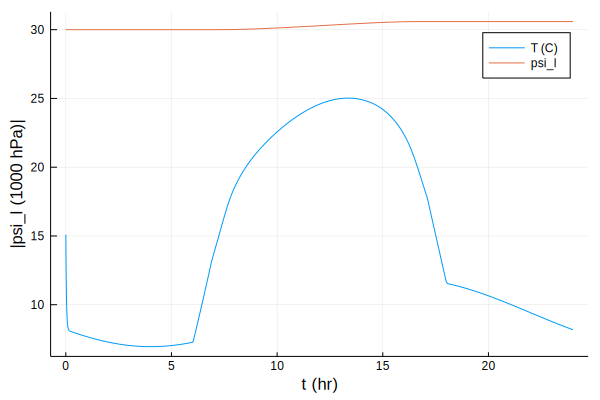

In [23]:
plot(t/3600, T_t-273.15*ones(size(T_t)),xlabel = "t (hr)",ylabel = "T (C)",label="T (C)",ylim=0:100)
plot!(t/3600,-psil_t/10000,xlabel = "t (hr)",ylabel = "|psi_l (1000 hPa)|",label="psi_l",ylim=0:100)

In [24]:
savefig(joinpath(output_dir, "T_psi_diurnal_t.png"))

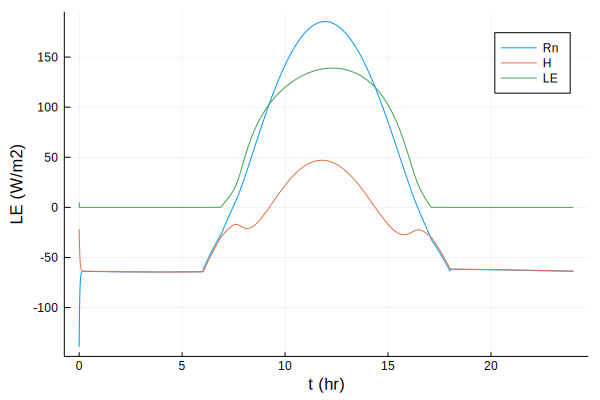

In [25]:
plot(t/3600,  Rn_t,xlabel = "t (hr)",ylabel = "Rn (W/m2)",label="Rn")
plot!(t/3600, H_t,xlabel  = "t (hr)",ylabel = "H (W/m2)" ,label="H")
plot!(t/3600, LE_t,xlabel = "t (hr)",ylabel = "LE (W/m2)",label="LE")

In [26]:
savefig(joinpath(output_dir, "Fluxes_diurnal_t.png"))

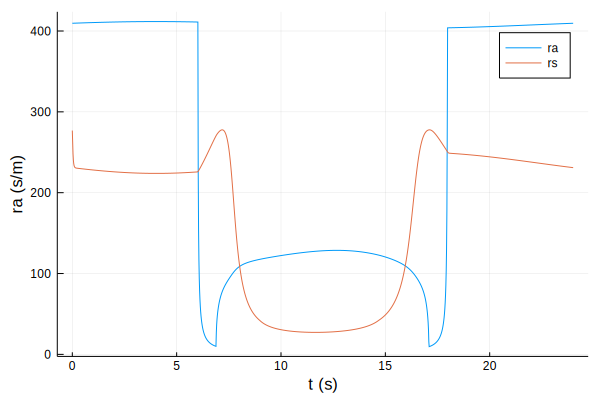

In [27]:
plot(t/3600,  rs_t,xlabel = "t (s)",ylabel = "rs (s/m)",label="ra")
plot!(t/3600, ra_t,xlabel  = "t (s)",ylabel = "ra (s/m)" ,label="rs")

In [28]:
savefig(joinpath(output_dir, "resistances_diurnal_t.png"))

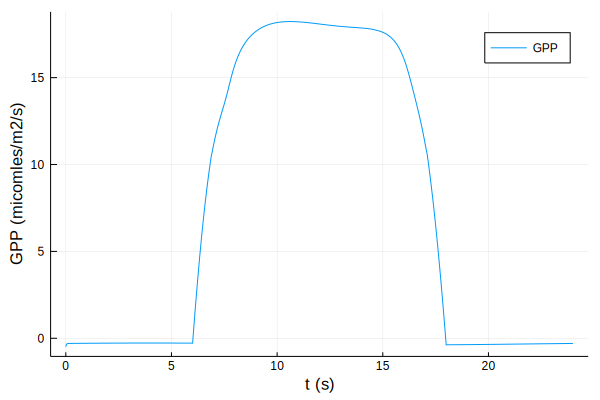

In [29]:
plot(t/3600, GPP_t,xlabel = "t (s)",ylabel = "GPP (micomles/m2/s)",label="GPP",ylim=0:100)

In [30]:
savefig(joinpath(output_dir, "GPP_diurnal_t.png"))

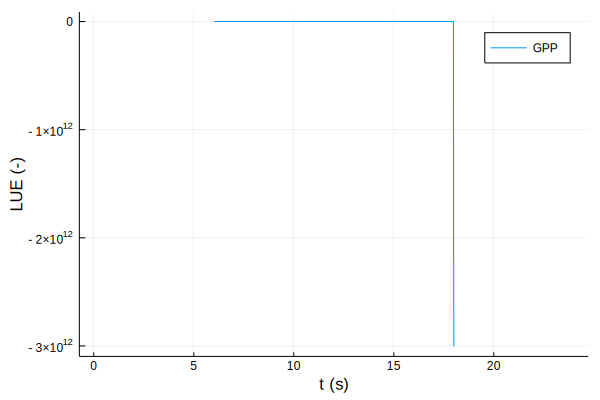

In [31]:
plot(t/3600, LUE_t,xlabel = "t (s)",ylabel = "LUE (-)",label="GPP",ylim=0:100)

In [32]:
savefig(joinpath(output_dir, "LUE_diurnal_t.png"))